In [24]:
import pandas as pd

# 

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv

In [25]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [26]:
y_train = np.log(train_data['SalePrice'])

In [27]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
import numpy as np
good_columns = [i for i, j in zip(train_data.columns, train_data.dtypes) if j in [np.int64, np.float64] and (not i in ['Id', 'SalePrice'])]
len(good_columns)

36

In [129]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures

x_train = train_data[good_columns].fillna(0)
x_test = test_data[good_columns].fillna(0)

# pf = PolynomialFeatures(degree=3).fit(x_train)
# x_train = pf.transform(x_train)
# x_test = pf.transform(x_test)

# def sigma(x):
#     return 1 / (1 + np.exp(-x))

# x_train = np.append(x_train.values, np.log(x_train.values + 1), axis=1)
# x_test = np.append(x_test.values, np.log(x_test.values + 1), axis=1)

In [130]:
x_train.shape

(1460, 36)

In [131]:
# x + x^2 + x^3

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3)

In [134]:
# reg = LinearRegression().fit(x_train, y_train)

# y_train_pred = reg.predict(x_train)

# mse(y_train, y_train_pred) ** 0.5, r2_score(y_train, y_train_pred)

In [138]:
reg = LinearRegression().fit(x_tr, y_tr)
y_train_pred = reg.predict(x_tr)
mse(y_tr, y_train_pred) ** 0.5, r2_score(y_tr, y_train_pred)

(0.1476225978721617, 0.8560651948710701)

In [137]:
y_val_pred = reg.predict(x_val)
mse(y_val, y_val_pred) ** 0.5, r2_score(y_val, y_val_pred)

(0.14312424912933516, 0.8850447425368378)

# cross validation

In [178]:
from sklearn.model_selection import KFold

data = []
models = []
test_predicts = []
train_predicts = []


cv = KFold(n_splits=6)
k = 0
for tr_i, val_i in cv.split(x_train):
    x_tr = x_train.values[tr_i]
    x_val = x_train.values[val_i]
    
    y_tr = y_train[tr_i]
    y_val = y_train[val_i]   
    
    reg = LinearRegression().fit(x_tr, y_tr)
    y_train_pred = reg.predict(x_tr)
    y_val_pred = reg.predict(x_val)
    
    mse_tr = mse(y_tr, y_train_pred) ** 0.5
    mse_val = mse(y_val, y_val_pred) ** 0.5    
    
    data.append({'mse_tr': mse_tr, 'mse_val': mse_val, 'fold': k})
    models.append(reg)
    
    train_predicts.append(reg.predict(x_train))
    test_predicts.append(reg.predict(x_test))
    
    k += 1

C:\Users\Wailt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Wailt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Wailt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Wailt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Wailt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Us

In [179]:
import pandas as pd
qualities = pd.DataFrame(data)
qualities.mean()

mse_tr     0.143611
mse_val    0.155261
fold       2.500000
dtype: float64

In [166]:
mse_tr = mse(y_train, np.array(train_predicts).mean(axis=0)) ** 0.5
# mse_val = mse(y_val, np.array(test_predicts).mean(axis=0)) ** 0.5  

mse_tr

0.14485137666885134

# Bootstrap (nonparametric)

In [222]:
from sklearn.model_selection import KFold

data = []
models = []
test_predicts = []
train_predicts = []

N = 10
for k in range(N):
    x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2)
    
    reg = LinearRegression().fit(x_tr, y_tr)
    y_train_pred = reg.predict(x_tr)
    y_val_pred = reg.predict(x_val)
    
    mse_tr = mse(y_tr, y_train_pred) ** 0.5
    mse_val = mse(y_val, y_val_pred) ** 0.5    
    
    data.append({'mse_tr': mse_tr, 'mse_val': mse_val, 'fold': k})
    models.append(reg)
    
    train_predicts.append(reg.predict(x_train))
    test_predicts.append(reg.predict(x_test))

In [223]:
qualities = pd.DataFrame(data)
qualities.mean()

mse_tr     0.145275
mse_val    0.146890
fold       4.500000
dtype: float64

In [224]:
y_test = np.array(test_predicts).mean(axis=0)#reg.predict(x_test)

In [225]:
res = pd.DataFrame()
res['Id'] = test_data['Id']
res['SalePrice'] = np.exp(y_test)

In [226]:
res.to_csv('ensamble.csv', index=False)

# Feature selector

In [227]:
x_train.shape[1]

36

In [248]:
from sklearn.model_selection import KFold

x_tr_, x_val_, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3)

data = []

reg = LinearRegression().fit(x_tr_, y_tr)
y_val_all_pred = reg.predict(x_val_)
y_tr_all_pred = reg.predict(x_tr_)

mse_val_all = mse(y_val, y_val_all_pred) ** 0.5
mse_tr_all = mse(y_tr, y_tr_all_pred) ** 0.5

for i in range(x_train.shape[1]):
    x_tr = np.delete(x_tr_.values, i, axis=1)
    x_val = np.delete(x_val_.values, i, axis=1)
    
    reg = LinearRegression().fit(x_tr, y_tr)
    y_tr_pred = reg.predict(x_tr)
    y_val_pred = reg.predict(x_val)
    
    
    mse_val = mse(y_val, y_val_pred) ** 0.5
    mse_tr = mse(y_tr, y_tr_pred) ** 0.5

    data.append({'mse_val': mse_val, 'mse_tr': mse_tr, 'feature': i})

In [246]:
res = pd.DataFrame(data)

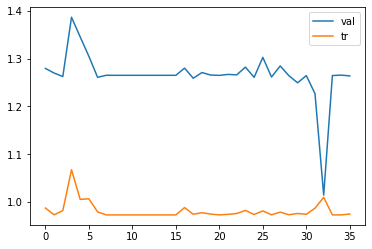

In [252]:
from matplotlib import pyplot as plt
plt.plot(res['mse_val'] / mse_val_all)
plt.plot(res['mse_tr'] / mse_tr_all)
plt.legend(['val', 'tr'])